In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 데이터 불러오기

In [31]:
df_raw = pd.read_csv("rawdata/SCALE불량2.csv", encoding = "CP949")

In [32]:
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,SPEC.1
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,116,1133,59,282,1133,934,적용,8,2조,AB
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,122,1135,53,283,1135,937,적용,8,2조,AB
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,116,1121,55,282,1121,889,적용,8,3조,NV
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,125,1127,68,316,1127,885,적용,8,3조,NV
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,134,1128,48,314,1128,873,적용,8,1조,BV


### 데이터 확인하기

In [33]:
len(df_raw)

720

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 22 columns):
PLATE_NO             720 non-null object
ROLLING_DATE         720 non-null object
SCALE                720 non-null object
SPEC                 720 non-null object
STEEL_KIND           720 non-null object
PT_THK               720 non-null float64
PT_WDTH              720 non-null int64
PT_LTH               720 non-null int64
PT_WGT               720 non-null int64
FUR_NO               720 non-null object
FUR_NO_ROW           720 non-null int64
FUR_HZ_TEMP          720 non-null int64
FUR_HZ_TIME          720 non-null int64
FUR_SZ_TEMP          720 non-null int64
FUR_SZ_TIME          720 non-null int64
FUR_TIME             720 non-null int64
FUR_EXTEMP           720 non-null int64
ROLLING_TEMP_T5      720 non-null int64
HSB                  720 non-null object
ROLLING_DESCALING    720 non-null int64
WORK_GR              720 non-null object
SPEC.1               720 non-null object
dtyp

In [6]:
df_raw.describe()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,29.267857,2807.127778,34323.269444,41481.777778,1.497222,1155.338889,88.527778,1149.666667,78.802778,300.563889,1149.666667,933.920833,8.319444
std,19.152651,517.839690,13828.434837,24751.322015,0.500340,20.866398,37.660799,17.571788,36.421004,45.390303,17.571788,107.863887,1.623252
min,12.030000,1800.000000,7893.000000,7820.000000,1.000000,1103.000000,43.000000,1113.000000,35.000000,221.000000,1113.000000,0.000000,5.000000
25%,16.090000,2466.000000,22663.000000,17757.500000,1.000000,1139.000000,65.000000,1132.000000,57.750000,257.000000,1132.000000,889.750000,6.000000
50%,20.130000,2725.000000,37380.000000,36120.000000,1.000000,1158.000000,75.000000,1155.000000,67.500000,304.000000,1155.000000,951.000000,8.000000
75%,40.000000,3125.000000,43735.000000,61120.000000,2.000000,1171.000000,101.000000,1164.000000,86.000000,342.000000,1164.000000,994.250000,10.000000
max,100.340000,4575.000000,54917.000000,115080.000000,2.000000,1206.000000,312.000000,1185.000000,294.000000,398.000000,1185.000000,1078.000000,10.000000


### 시각화로 데이터 확인하기

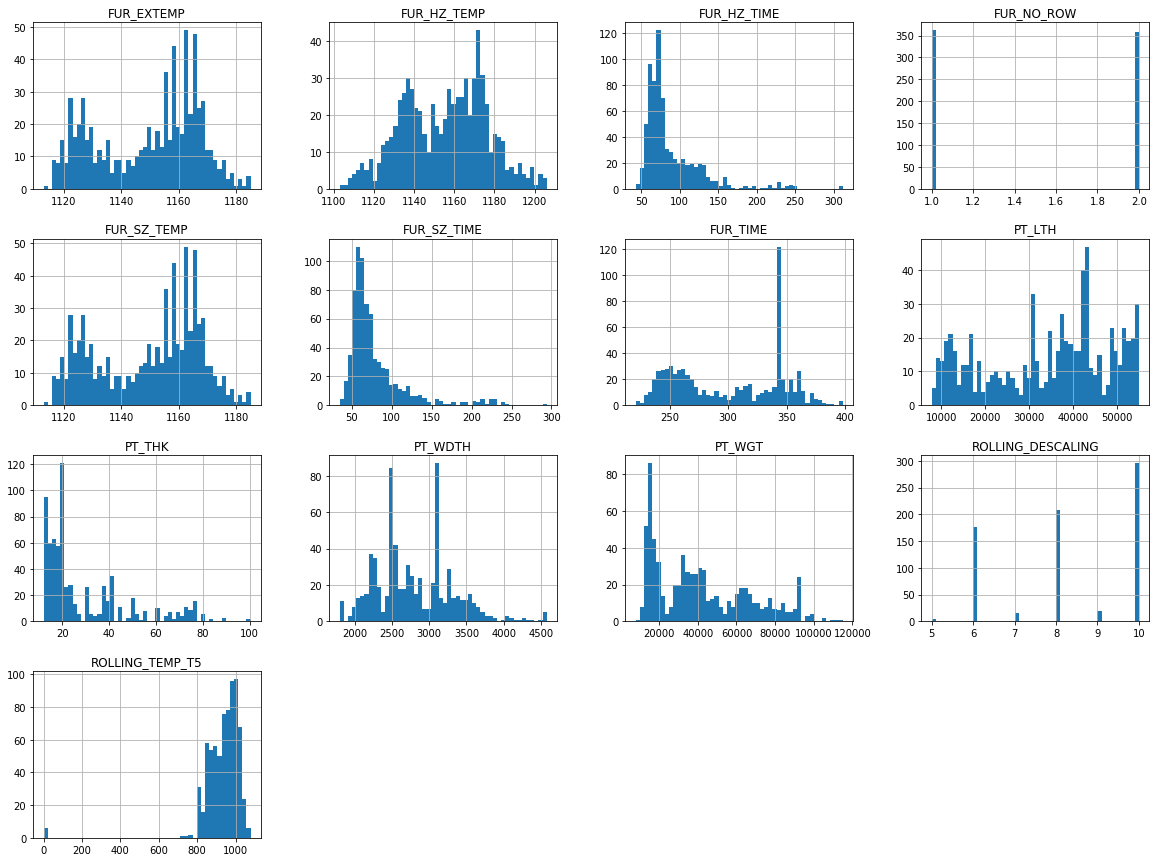

In [7]:
%matplotlib inline
df_raw.hist(bins=50, figsize = (20, 15))
plt.show()

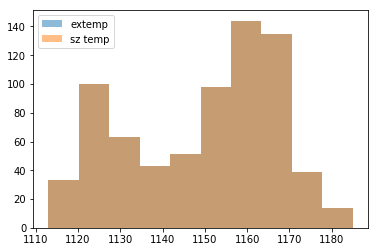

In [8]:
plt.hist(df_raw["FUR_EXTEMP"], label = "extemp", alpha = 0.5)
plt.hist(df_raw["FUR_SZ_TEMP"], label = "sz temp", alpha = 0.5)

plt.legend()

# fur - 고로?
# alpha = transparency

In [9]:
df_raw[["FUR_EXTEMP", "FUR_SZ_TEMP"]].corr()
# FUR_EXTEMP & FUR_SZ_TEMP 상관관계 분석 : Identical 둘 중 하나 제외한다
# Logistic은 빼줘야하고, Algorithms 에서는 중요도 자동으로 빼줄것이다.

,FUR_EXTEMP,FUR_SZ_TEMP
FUR_EXTEMP,1.0,1.0
FUR_SZ_TEMP,1.0,1.0


In [10]:
df_raw.corr()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
PT_THK,1.000000,-0.313151,-0.862618,-0.397391,-0.002530,-0.523926,0.160110,-0.694770,0.113171,0.413009,-0.694770,-0.373976,-0.836631
PT_WDTH,-0.313151,1.000000,0.119726,0.031009,0.006727,0.180024,-0.119175,0.227296,0.022627,-0.393200,0.227296,-0.021807,0.337540
PT_LTH,-0.862618,0.119726,1.000000,0.451815,-0.021185,0.473111,-0.077392,0.645402,-0.070225,-0.251950,0.645402,0.312762,0.809280
PT_WGT,-0.397391,0.031009,0.451815,1.000000,-0.022241,0.153331,0.010491,0.359513,-0.190922,-0.057776,0.359513,0.263216,0.238986
FUR_NO_ROW,-0.002530,0.006727,-0.021185,-0.022241,1.000000,0.004753,-0.015791,0.009228,0.049045,0.016053,0.009228,-0.004372,0.018219
FUR_HZ_TEMP,-0.523926,0.180024,0.473111,0.153331,0.004753,1.000000,-0.114395,0.772907,-0.222141,-0.348223,0.772907,0.265310,0.470899
FUR_HZ_TIME,0.160110,-0.119175,-0.077392,0.010491,-0.015791,-0.114395,1.000000,-0.203401,0.177922,0.473137,-0.203401,0.011609,-0.137742
FUR_SZ_TEMP,-0.694770,0.227296,0.645402,0.359513,0.009228,0.772907,-0.203401,1.000000,-0.450652,-0.477177,1.000000,0.452297,0.648646
FUR_SZ_TIME,0.113171,0.022627,-0.070225,-0.190922,0.049045,-0.222141,0.177922,-0.450652,1.000000,0.443176,-0.450652,-0.207358,-0.105667
FUR_TIME,0.413009,-0.393200,-0.251950,-0.057776,0.016053,-0.348223,0.473137,-0.477177,0.443176,1.000000,-0.477177,-0.199352,-0.366708


In [ ]:
sns.scatterplot(x="RUNTIME", y="OXY", hue = "GENDER", style = "GENDER", data = df_raw)

In [11]:
df_raw.isna().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
SPEC.1               0
dtype: int64

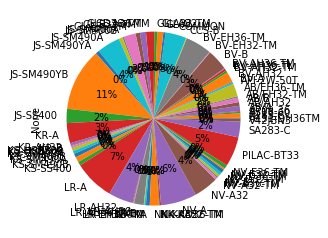

In [12]:
df_count = df_raw.groupby(["SPEC"]).size()
df_count.plot.pie(autopct = "%d%%")

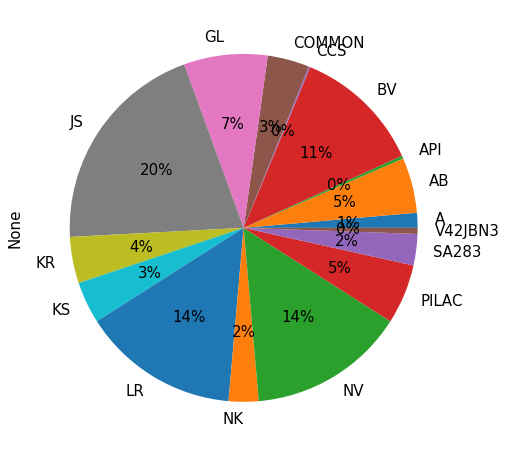

In [36]:
plt.rcParams['font.size'] = 15
df_count = df_raw.groupby(["SPEC.1"]).size()
df_count.plot.pie(autopct = "%d%%", figsize=(8, 8))

In [ ]:
df_raw["HSB"] = np.where(df_raw["HSB"] == "적용0",1,0) 

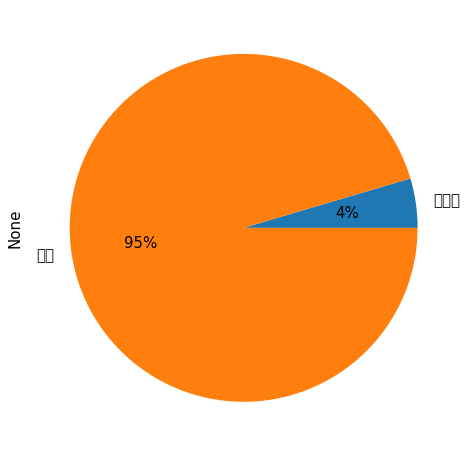

In [6]:
plt.rcParams['font.size'] = 15

df_count = df_raw.groupby(["HSB"]).size()
df_count.plot.pie(autopct = "%d%%", figsize=(8, 8))

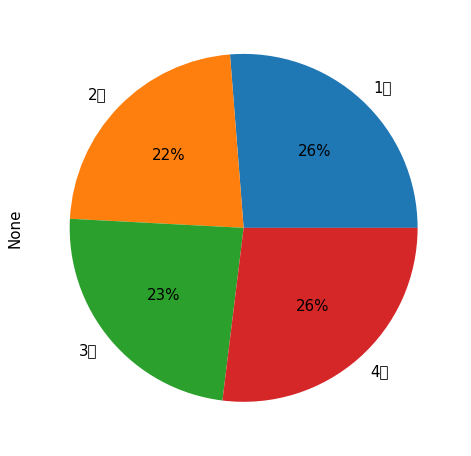

In [7]:
plt.rcParams['font.size'] = 15

df_count = df_raw.groupby(["WORK_GR"]).size()
df_count.plot.pie(autopct = "%d%%", figsize=(8, 8))

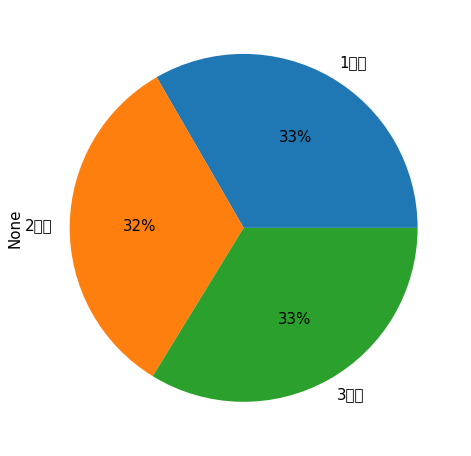

In [8]:
plt.rcParams['font.size'] = 15

df_count = df_raw.groupby(["FUR_NO"]).size()
df_count.plot.pie(autopct = "%d%%", figsize=(8, 8))

In [14]:
# 스펙을 앞에 문자 2개로 묶어보면 어떨까

In [15]:
df_raw["SPEC"].value_counts().sort_index(level = 0)

A131-DH36TM     1
A283-C          6
A516-60         2
A709-36         1
AB/A            7
AB/AH32         5
AB/B            6
AB/EH32-TM      2
AB/EH36-TM     17
API-2W-50T      2
BV-A            1
BV-AH32        14
BV-AH32-TM      3
BV-AH36-TL      3
BV-AH36-TM      1
BV-B           28
BV-EH32-TM      1
BV-EH36-TM     35
CCS-B           1
COMMON         28
GL-A            3
GL-A32          8
GL-A32-TM       4
GL-A36-TM      11
GL-D36-TM       8
GL-E32-TM       6
GL-E36-TM      16
JS-SM400A       2
JS-SM400B       5
JS-SM490A      31
               ..
KS-HSB500       2
KS-HSB600       1
KS-SM400A       4
KS-SM400B       4
KS-SM490A       5
KS-SM490B       7
KS-SS400        5
LR-A           54
LR-AH32        33
LR-AH36         1
LR-AH36-TM      1
LR-B           13
LR-EH32-TM      1
LR-EH36-TM      2
NK-KA           5
NK-KA32        12
NK-KA32-TM      1
NK-KD36-TM      2
NV-A           48
NV-A32         33
NV-A32-TM       3
NV-A36-TM       2
NV-B            3
NV-D32-TM       4
NV-D36-TM 

In [16]:
df_raw["SPEC"].unique()

array(['AB/EH32-TM', 'NV-E36-TM', 'BV-EH36-TM', 'COMMON', 'GL-E32-TM',
       'GL-E36-TM', 'AB/EH36-TM', 'KS-HSB600', 'LR-EH36-TM', 'BV-B',
       'LR-B', 'JS-SM490YB', 'KR-B', 'LR-A', 'JS-SM490A', 'KS-SM400B',
       'JS-SM400B', 'AB/B', 'KS-SS400', 'KR-A', 'NV-A', 'JS-SS400',
       'KS-SM400A', 'KS-SM490B', 'V42JBN3', 'BV-AH32', 'JS-SM490YA',
       'AB/AH32', 'LR-AH32', 'NV-B', 'NV-A32', 'KS-SM490A', 'NK-KA32',
       'GL-A32', 'AB/A', 'LR-AH36', 'A709-36', 'KR-AH32', 'A516-60',
       'GL-A', 'NK-KA', 'NV-D36-TM', 'NK-KA32-TM', 'GL-A32-TM',
       'LR-AH36-TM', 'LR-EH32-TM', 'NV-E32-TM', 'KS-HSB500', 'API-2W-50T',
       'GL-A36-TM', 'BV-EH32-TM', 'NV-A32-TM', 'NV-D32-TM', 'NK-KD36-TM',
       'GL-D36-TM', 'PILAC-BT33', 'BV-AH32-TM', 'BV-AH36-TM', 'NV-A36-TM',
       'A131-DH36TM', 'BV-AH36-TL', 'BV-A', 'CCS-B', 'A283-C', 'SA283-C',
       'JS-SM400A'], dtype=object)

In [13]:
specs = {}

for spec in df_raw["SPEC"]:
    if spec[0:2] in specs:
        specs[spec[0:2]] = specs[spec[0:2]] + 1
    else:
        specs[spec[0:2]] = 1

In [18]:
specs

{'AB': 37,
 'NV': 105,
 'BV': 86,
 'CO': 28,
 'GL': 56,
 'KS': 28,
 'LR': 105,
 'JS': 146,
 'KR': 31,
 'V4': 4,
 'NK': 20,
 'A7': 1,
 'A5': 2,
 'AP': 2,
 'PI': 40,
 'A1': 1,
 'CC': 1,
 'A2': 6,
 'SA': 21}

In [19]:
len(specs)

19

In [20]:
len(df_raw["SPEC"].unique())

66

### 전처리

### 범주형 변수 확인

In [34]:
obj_cols = df_raw.select_dtypes("object").columns
for col in obj_cols:
    _n = len(df_raw[col].value_counts())
    print(col, ":", str(_n))

PLATE_NO : 720
ROLLING_DATE : 704
SCALE : 2
SPEC : 66
STEEL_KIND : 9
FUR_NO : 3
HSB : 2
WORK_GR : 4
SPEC.1 : 16


In [35]:
# 필요없는 변수 버리기
df_raw = df_raw.drop(["PLATE_NO", "ROLLING_DATE", "FUR_SZ_TEMP"], axis = 1)

In [36]:
obj_cols = df_raw.select_dtypes("object").columns
for col in obj_cols:
    _n = len(df_raw[col].value_counts())
    print(col, ":", str(_n))

SCALE : 2
SPEC : 66
STEEL_KIND : 9
FUR_NO : 3
HSB : 2
WORK_GR : 4
SPEC.1 : 16


In [37]:
import numpy as np

In [38]:
# 불량/양품 0과 1로 변경
df_raw["SCALE"] = np.where(df_raw["SCALE"] == "불량", 1, 0)

In [39]:
df_raw.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,SPEC.1
0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,59,282,1133,934,적용,8,2조,AB
1,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,53,283,1135,937,적용,8,2조,AB
2,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,55,282,1121,889,적용,8,3조,NV
3,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,68,316,1127,885,적용,8,3조,NV
4,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,48,314,1128,873,적용,8,1조,BV


In [40]:
df_raw["SCALE"].value_counts()

0    489
1    231
Name: SCALE, dtype: int64

In [41]:
df_raw["HSB"] = np.where(df_raw["HSB"] == "적용", 1, 0)

In [42]:
df_raw.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,SPEC.1
0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,59,282,1133,934,1,8,2조,AB
1,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,53,283,1135,937,1,8,2조,AB
2,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,55,282,1121,889,1,8,3조,NV
3,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,68,316,1127,885,1,8,3조,NV
4,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,48,314,1128,873,1,8,1조,BV


In [14]:
df_raw["HSB"].value_counts()

1    687
0     33
Name: HSB, dtype: int64

In [15]:
obj_cols = df_raw.select_dtypes("object").columns
for col in obj_cols:
    _n = len(df_raw[col].value_counts())
    print(col, ":", str(_n))

SPEC : 66
STEEL_KIND : 9
FUR_NO : 3
WORK_GR : 4
SPEC.1 : 16


In [32]:
df_raw_spec = df_raw["SPEC"]

In [33]:
df_raw = df_raw.drop(["SPEC"], axis = 1)

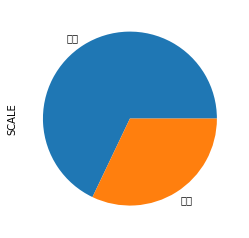

In [12]:
df_count = df_raw["SCALE"].value_counts()
df_count.plot.pie()

In [13]:
df_count

양품    489
불량    231
Name: SCALE, dtype: int64

In [15]:
1 - (489 / (489+231))

0.3208333333333333

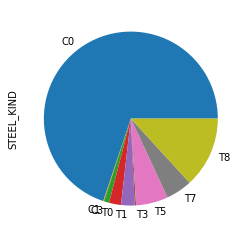

In [35]:
df_count = df_raw["STEEL_KIND"].value_counts()
df_count.sort_index(inplace=True);
df_count.plot.pie()

### 가설 설정

In [44]:
print("HELLO")

HELLO


#### Steel 종류별로 평균의 차이가 날까?

In [75]:
# Steel 종류별로 평균의 차이가 날까?

In [93]:
a = df_raw.groupby(["STEEL_KIND", "SCALE"])["SCALE"].value_counts()

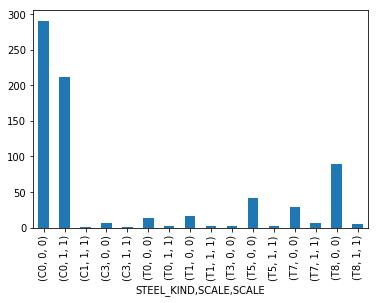

In [74]:
a.plot.bar()

In [85]:
a = df_raw.groupby(["STEEL_KIND", "SCALE"])["SCALE"].mean()

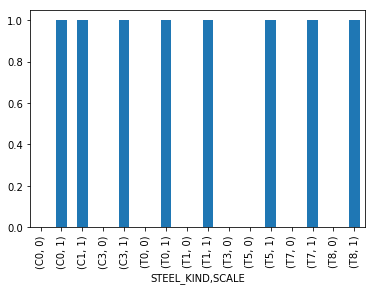

In [86]:
a.plot.bar()

In [87]:
a = df_raw.groupby(["STEEL_KIND"])["SCALE"].value_counts()

In [88]:
a

STEEL_KIND  SCALE
C0          0        291
            1        212
C1          1          1
C3          0          6
            1          1
T0          0         14
            1          2
T1          0         16
            1          2
T3          0          2
T5          0         41
            1          2
T7          0         29
            1          6
T8          0         90
            1          5
Name: SCALE, dtype: int64

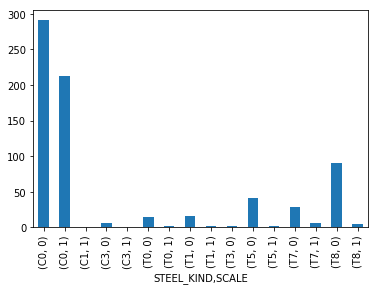

In [89]:
a.plot.bar()

In [90]:
a = df_raw.groupby(["STEEL_KIND"])["SCALE"].mean()

In [91]:
a

STEEL_KIND
C0    0.421471
C1    1.000000
C3    0.142857
T0    0.125000
T1    0.111111
T3    0.000000
T5    0.046512
T7    0.171429
T8    0.052632
Name: SCALE, dtype: float64

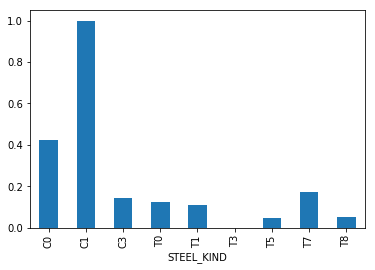

In [92]:
a.plot.bar()

#### Spec_modified (목적별) 강재가 영향을 줄까?

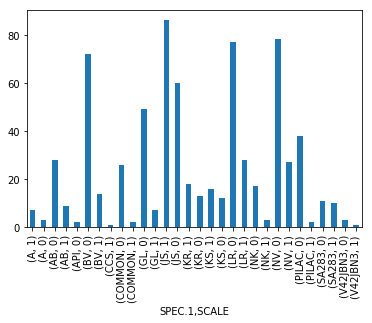

In [96]:
spec_modified_value = df_raw.groupby(["SPEC.1"])["SCALE"].value_counts().plot.bar()

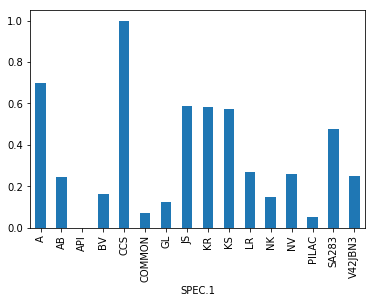

In [98]:
a = df_raw.groupby(["SPEC.1"])["SCALE"].mean().plot.bar()

#### 잠재적 인자 확인

In [18]:
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,SPEC.1
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,116,1133,59,282,1133,934,적용,8,2조,AB
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,122,1135,53,283,1135,937,적용,8,2조,AB
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,116,1121,55,282,1121,889,적용,8,3조,NV
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,125,1127,68,316,1127,885,적용,8,3조,NV
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,134,1128,48,314,1128,873,적용,8,1조,BV


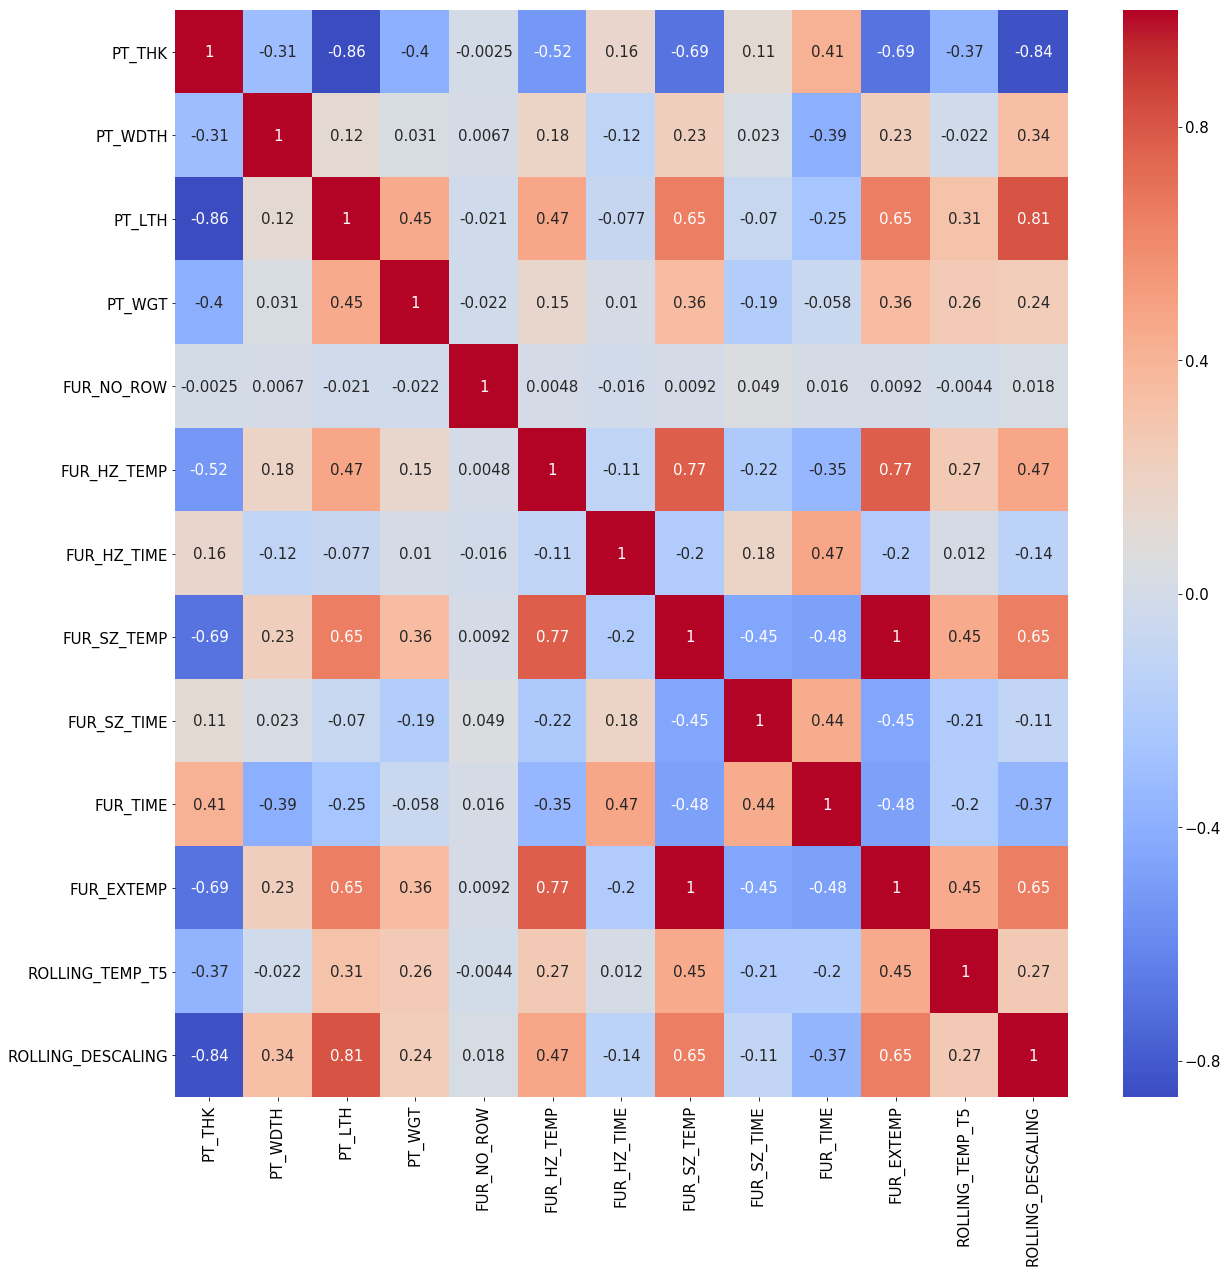

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df_raw.corr(), cmap='coolwarm', annot=True);



In [106]:
df_temps = pd.DataFrame()
for temps in df_raw:
    if "TEMP" in temps:
        df_temps[temps] = df_raw[temps]
        
df_temps["SCALE"] = df_raw["SCALE"]

In [107]:
df_temps.corr()

,FUR_HZ_TEMP,FUR_EXTEMP,ROLLING_TEMP_T5,SCALE
FUR_HZ_TEMP,1.000000,0.772907,0.265310,0.247670
FUR_EXTEMP,0.772907,1.000000,0.452297,0.374809
ROLLING_TEMP_T5,0.265310,0.452297,1.000000,0.384967
SCALE,0.247670,0.374809,0.384967,1.000000


In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler as sds
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [20]:
df_raw.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,SPEC.1
0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,59,282,1133,934,1,8,2조,AB
1,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,53,283,1135,937,1,8,2조,AB
2,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,55,282,1121,889,1,8,3조,NV
3,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,68,316,1127,885,1,8,3조,NV
4,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,48,314,1128,873,1,8,1조,BV


In [47]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)
print("train data size\t: {}".format(df_train.shape))
print("test data size\t: {}".format(df_test.shape))

train data size	: (504, 19)
test data size	: (216, 19)


In [46]:
log_model = Logit.from_formula("SCALE ~ FUR_HZ_TEMP + FUR_SZ_TEMP",  df_train)
log_result = log_model.fit()

PatsyError: Error evaluating factor: NameError: name 'FUR_SZ_TEMP' is not defined
    SCALE ~ FUR_HZ_TEMP + FUR_SZ_TEMP
                          ^^^^^^^^^^^

In [40]:
print(log_result.summary())

                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      501
Method:                           MLE   Df Model:                            2
Date:                Sun, 28 Jul 2019   Pseudo R-squ.:                  0.1496
Time:                        01:19:46   Log-Likelihood:                -267.86
converged:                       True   LL-Null:                       -314.97
                                        LLR p-value:                 3.466e-21
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -69.4322      8.681     -7.998      0.000     -86.447     -52.417
FUR_HZ_TEMP    -0.0229      0.009     -2.641      0.008      -0.040      -0.006
FUR_SZ_TEMP     0.0826      0.012      6.768    

In [41]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

146    1
131    1
650    0
613    0
355    0
dtype: int64

In [42]:
print("Accuracy: %.3f \n" % accuracy_score(df_test["SCALE"], y_pred_class))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["SCALE"], y_pred_class)))

Accuracy: 0.667 

Confusion Matrix:
[[121  24]
 [ 48  23]]


In [48]:
log_model = Logit.from_formula("SCALE ~ ROLLING_DESCALING",  df_train)
log_result = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.624937
         Iterations 5


In [49]:
print(log_result.summary())

                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      502
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Jul 2019   Pseudo R-squ.:               5.616e-06
Time:                        03:29:55   Log-Likelihood:                -314.97
converged:                       True   LL-Null:                       -314.97
                                        LLR p-value:                    0.9526
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7944      0.495     -1.604      0.109      -1.765       0.176
ROLLING_DESCALING     0.0035      0.059      0.059      0.953      -0.111       0.118


In [50]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("Accuracy: %.3f \n" % accuracy_score(df_test["SCALE"], y_pred_class))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["SCALE"], y_pred_class)))

Accuracy: 0.671 

Confusion Matrix:
[[145   0]
 [ 71   0]]


In [46]:
log_model = Logit.from_formula("SCALE ~ PT_THK",  df_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.616536
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      502
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Jul 2019   Pseudo R-squ.:                 0.01345
Time:                        01:19:52   Log-Likelihood:                -310.73
converged:                       True   LL-Null:                       -314.97
                                        LLR p-value:                  0.003607
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3252      0.180     -1.810      0.070      -0.677       0.027
PT_THK        -0.0155      0.

In [47]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("Accuracy: %.3f \n" % accuracy_score(df_test["SCALE"], y_pred_class))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["SCALE"], y_pred_class)))

Accuracy: 0.671 

Confusion Matrix:
[[145   0]
 [ 71   0]]


In [48]:
dfA = df_raw["FUR_HZ_TEMP"]
dfB = df_raw["FUR_SZ_TEMP"]

In [50]:
from scipy import stats

In [51]:
t_result = stats.ttest_ind(dfA, dfB, equal_var = True)
t, p = t_result.statistic, t_result.pvalue

In [56]:
print ("%.3f, %.3f" % (t, p))

5.579, 0.000


In [61]:
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,SPEC.1
0,PB562774,2008-08-01:00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,116,1133,59,282,1133,934,적용,8,2조,AB
1,PB562775,2008-08-01:00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,122,1135,53,283,1135,937,적용,8,2조,AB
2,PB562776,2008-08-01:00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,116,1121,55,282,1121,889,적용,8,3조,NV
3,PB562777,2008-08-01:00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,125,1127,68,316,1127,885,적용,8,3조,NV
4,PB562778,2008-08-01:00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,134,1128,48,314,1128,873,적용,8,1조,BV


In [62]:
df_raw["HSB"] = np.where(df_raw["HSB"] == "적용", 0, 1)


In [51]:
log_model = Logit.from_formula("SCALE ~ HSB",  df_train)
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.570187
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      502
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Jul 2019   Pseudo R-squ.:                 0.08761
Time:                        03:30:02   Log-Likelihood:                -287.37
converged:                      False   LL-Null:                       -314.97
                                        LLR p-value:                 1.093e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.0816   4784.100      0.004      0.997   -9356.582    9396.745
HSB          -21.0023   4784.100     -0.004      0.996   -9397.66

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [52]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("Accuracy: %.3f \n" % accuracy_score(df_test["SCALE"], y_pred_class))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["SCALE"], y_pred_class)))

Accuracy: 0.718 

Confusion Matrix:
[[145   0]
 [ 61  10]]


In [53]:
log_model = Logit.from_formula("SCALE ~ ROLLING_TEMP_T5",  df_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.418018
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      502
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Jul 2019   Pseudo R-squ.:                  0.3311
Time:                        03:30:07   Log-Likelihood:                -210.68
converged:                       True   LL-Null:                       -314.97
                                        LLR p-value:                 2.807e-47
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -30.6486      2.954    -10.374      0.000     -36.439     -24.858
ROLLING_TEMP_T

In [54]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("Accuracy: %.3f \n" % accuracy_score(df_test["SCALE"], y_pred_class))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["SCALE"], y_pred_class)))

Accuracy: 0.801 

Confusion Matrix:
[[122  23]
 [ 20  51]]


In [70]:
import statsmodels.formula.api as smf

In [71]:
reg_model = smf.ols(formula = "FUR_HZ_TEMP ~ FUR_TIME", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:            FUR_HZ_TEMP   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     99.08
Date:                Sun, 28 Jul 2019   Prob (F-statistic):           5.94e-22
Time:                        01:39:21   Log-Likelihood:                -3162.1
No. Observations:                 720   AIC:                             6328.
Df Residuals:                     718   BIC:                             6337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1203.4537      4.889    246.178      0.0

# 로지스틱

In [23]:
for i in list(df_raw):
    print (i, end = " + ")

SCALE + SPEC + STEEL_KIND + PT_THK + PT_WDTH + PT_LTH + PT_WGT + FUR_NO + FUR_NO_ROW + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP + ROLLING_TEMP_T5 + HSB + ROLLING_DESCALING + WORK_GR + SPEC.1 + 

In [26]:
df_raw.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,SPEC.1
0,1,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,59,282,1133,934,1,8,2조,AB
1,1,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,53,283,1135,937,1,8,2조,AB
2,1,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,55,282,1121,889,1,8,3조,NV
3,1,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,68,316,1127,885,1,8,3조,NV
4,1,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,48,314,1128,873,1,8,1조,BV


In [28]:
log_model = Logit.from_formula("""SCALE ~ C(SPEC) +
                               C(STEEL_KIND) + PT_THK + PT_WDTH + PT_LTH + PT_WGT + C(FUR_NO) + C(FUR_NO_ROW) + FUR_HZ_TEMP
                               + FUR_HZ_TIME + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP + ROLLING_TEMP_T5 + HSB
                               + ROLLING_DESCALING + C(WORK_GR)""", df_train)


In [29]:
log_result = log_model.fit()
print(log_result.summary())

PerfectSeparationError: Perfect separation detected, results not available